<a href="https://colab.research.google.com/github/Mazwan98/dicoding/blob/main/Proyek_Analisis_Data_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: **Rendy Prasetya**
- Email: **rendyprasetya45@gmail.com**
- Id Dicoding: **rendypraas**

## Menentukan Pertanyaan Bisnis

- Apa saja Produk terlaris dan tidak?
- Seberapa banyak budget yang dihabiskan customer dalam beberapa bulan terakhir?
- Seiring berjalannya waktu, Bagaimana performa penjualan pada platform E-Commerce ?
- Bagaimana tingkat kepuasan customer terhadap layanan kami?
- Bagaimana profil demografis customer dan apakah ada perbedaan preferensi pembelian di antara mereka?
- Customer terbanyak berdasarkan letak geografis, dimana saja?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import urllib.request
import streamlit as st
import geopandas as gpd
import time


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.8 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1mNRnzXF4qoGj_LjFF3RdPLLhxso6tjltl6e-sLGdqvw/export?format=csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geo_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1eOZHB_7AdN-Lhxh7G1onTvATvllmifGKNyIHDC77X9U/export?format=csv')
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-2.354.562.128.115.260,-4.663.929.204.800.160,sao paulo,SP
1,1046,-23.546.081.127.035.500,-4.664.482.029.837.150,sao paulo,SP
2,1046,-2.354.612.896.641.460,-4.664.295.148.361.130,sao paulo,SP
3,1041,-235.443.921.648.681,-4.663.949.930.627.840,sao paulo,SP
4,1035,-23.541.577.961.711.400,-4.664.160.722.329.610,sao paulo,SP


In [4]:
order_items = pd.read_csv('https://docs.google.com/spreadsheets/d/1WVA7m5D0bMBsx73ZZKO8oBywDUBoNvQbzn8XHAqX18A/export?format=csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 9:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_pay = pd.read_csv('https://docs.google.com/spreadsheets/d/16jeOkpVY2ZW-pDoQdLEpNRrOe8hTeyjE9EzY_IyMFEw/export?format=csv')
order_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_rev = pd.read_csv('https://docs.google.com/spreadsheets/d/1MWFoA52Lw80wiAJ4Bs2Vk25jtyqgiQy5s1cPhhNbQqU/export?format=csv')
order_rev.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 0:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 0:00:00,2018-03-11 3:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 0:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 0:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 0:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1frAvA2DJZIYN92_EPKcArdDrNUlNiA2Lg4-X9IQ3GHw/export?format=csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00


In [8]:
product_cat = pd.read_csv('https://docs.google.com/spreadsheets/d/1rSoWuwnDSNiUQ3vmktErrbLVHPRXmPQJS8Nlrcj0pOY/export?format=csv')
product_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1djCxcInUkmDgd_a-uJ1PMvX-WkHiFuktSAXffvin8Yc/export?format=csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1VkK6SMaSyP_Uh8wWX7YAObxUsiALb_e4qKqwq8Z3cz4/export?format=csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data
*Menilai Data*

In [11]:
print('\n', customers_df.info())
print('\n', geo_df.info())
print('\n', order_items.info())
print('\n', order_pay.info())
print('\n', order_rev.info())
print('\n', orders_df.info())
print('\n', product_cat.info())
print('\n', products_df.info())
print('\n', sellers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   geolocation_zip_code_prefix  1000163 non-null  int64 
 1   geolocation_lat              1000163 non-null  object
 2   geolocation_lng              1000163 non-null  object
 3   geolocation_city             1000163 non-null

*apakah ada data null pada setiap DataFrame ?*

In [12]:
print('\nInfo data null customers:\n', customers_df.isnull().sum())
print('\nInfo data null geolocation:\n', geo_df.isnull().sum())
print('\nInfo data null order items:\n', order_items.isnull().sum())
print('\nInfo data null order payments:\n', order_pay.isnull().sum())
print('\nInfo data null order reviews:\n', order_rev.isnull().sum())
print('\nInfo data null orders:\n', orders_df.isnull().sum())
print('\nInfo data null product category:\n', product_cat.isnull().sum())
print('\nInfo data null products:\n', products_df.isnull().sum())
print('\nInfo data null sellers:\n', sellers_df.isnull().sum())


Info data null customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info data null geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Info data null order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Info data null order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Info data null order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87658
review_comment_message     58256
review_cre

*ada data duplikat pada setiap DataFrame?*

In [13]:
print('Info data duplikat customers:', customers_df.duplicated().sum())
print('Info data duplikat geolocation:', geo_df.duplicated().sum())
print('Info data duplikat order items:', order_items.duplicated().sum())
print('Info data duplikat order payments:', order_pay.duplicated().sum())
print('Info data duplikat order reviews:', order_rev.duplicated().sum())
print('Info data duplikat orders:', orders_df.duplicated().sum())
print('Info data duplikat product category:', product_cat.duplicated().sum())
print('Info data duplikat products:', products_df.duplicated().sum())
print('Info data duplikat sellers:', sellers_df.duplicated().sum())

Info data duplikat customers: 0
Info data duplikat geolocation: 261831
Info data duplikat order items: 0
Info data duplikat order payments: 0
Info data duplikat order reviews: 0
Info data duplikat orders: 0
Info data duplikat product category: 0
Info data duplikat products: 0
Info data duplikat sellers: 0


In [14]:
print('\nData describe customers:\n', customers_df.describe(include='all'))
print('\nData describe geolocation:\n', geo_df.describe(include='all'))
print('\nData describe order items:\n', order_items.describe(include='all'))
print('\nData describe order payments:\n', order_pay.describe(include='all'))
print('\nData describe order reviews:\n', order_rev.describe(include='all'))
print('\nData describe orders:\n', orders_df.describe(include='all'))
print('\nData describe product category:\n', product_cat.describe(include='all'))
print('\nData describe products:\n', products_df.describe(include='all'))
print('\nData describe sellers:\n', sellers_df.describe(include='all'))


Data describe customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix cus

In [15]:
geo_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   geolocation_zip_code_prefix  1000163 non-null  int64 
 1   geolocation_lat              1000163 non-null  object
 2   geolocation_lng              1000163 non-null  object
 3   geolocation_city             1000163 non-null  object
 4   geolocation_state            1000163 non-null  object
dtypes: int64(1), object(4)
memory usage: 38.2+ MB


### Cleaning Data

Data duplikat tedapat pada Geolocation dataset, oleh karenanya drop duplikat tidak dilakukan. Mungkin pada kolom *'geolocation_city', 'geolocation_state'* value tertinggi adalah **sao paulo (SP)**

In [16]:
order_rev[order_rev.review_comment_title.isna()]


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 0:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 0:00:00,2018-03-11 3:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 0:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 0:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 0:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 0:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 0:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 0:00:00,2018-03-23 9:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 0:00:00,2018-07-02 12:59:13


In [17]:
order_rev.review_comment_title.value_counts()


,count
review_comment_title,
Recomendo,485
Ótimo,447
Excelente,367
recomendo,361
Bom,349
...,...
Não recebi.,1
produto com lacre violado,1
Atraso Entrega,1


In [18]:
order_rev[order_rev.review_comment_message.isna()]


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 0:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 0:00:00,2018-03-11 3:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 0:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 0:00:00,2018-04-16 0:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 0:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 0:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 0:00:00,2018-04-30 1:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 0:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 0:00:00,2017-12-11 20:06:42


In [19]:
order_rev.review_comment_message.value_counts()


,count
review_comment_message,
Muito bom,296
Bom,207
Ótimo,151
Recomendo,150
muito bom,134
...,...
recebi no tempo certo.obrigado.,1
Ótima loja entrega antes do prazo,1
"Bem antes da data máxima, ótimo ! Agora é ver se o aparelho funciona.",1


In [20]:
order_rev.fillna(value="no comment", inplace=True)


In [21]:
orders_df[orders_df.order_approved_at.isna()]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 0:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 0:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 0:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 0:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 0:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 0:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 0:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 0:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 0:00:00


In [22]:
datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  order_items[column] = pd.to_datetime(order_items[column])

In [23]:
datetime_or = ["review_creation_date","review_answer_timestamp"]

for column in datetime_or:
  order_rev[column] = pd.to_datetime(order_rev[column])

In [24]:
datetime_oo = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_oo:
  orders_df[column] = pd.to_datetime(orders_df[column])


In [25]:
order_items.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [26]:
order_rev.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [27]:
orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore **customers_df**

In [28]:
customers_df.sample(5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
43355,11db63d961c182ad4528247f61bf42e1,c618c71b02501af3c69315f552b53541,26052,nova iguacu,RJ
8617,9a19918870ea368b679af4ccead1a682,e00a116db9bafed27efa96cb571aa7ec,93821,sapiranga,RS
53323,75e63d9dec3fd2f8113350b847aada4c,6e8c0e15a8a6d670899110476f993044,8664,suzano,SP
87835,450a308ac9087c11e52bce959ef00335,cd0c3f3f239b29e891740c9cfad8e4a4,2362,sao paulo,SP
76889,96ad9d4b9f1ff026aae839d65dcd64ff,92310666b85a3217ffcefebdbb1bc042,26310,queimados,RJ


In [29]:
customers_df.describe(include='all')


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [30]:
customers_df.customer_id.is_unique


True

In [31]:
customers_df.customer_id.duplicated


<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [32]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)


,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ponto novo,1
populina,1
porteiras,1


In [33]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)


,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [34]:
order_pay.sample(5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
85432,d4497ce5e801d56876bd6c9e514767e5,1,credit_card,8,233.84
40586,fc7e6d607ce832df24d06b153b3a6c1e,1,credit_card,2,45.22
70887,853bcc471d6ed0eb620a497023eb9fa6,1,credit_card,8,138.25
88650,74ad3397d84521ee94f326aad1a35d14,1,boleto,1,189.51
51075,47746dec59be8d0a3591eb2e7ab72da5,1,credit_card,5,69.48


In [35]:
order_pay.describe(include='all')


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [36]:
order_pay.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)


,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [37]:
orders_df.sample(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
90800,6984dd59d3223f88d356dd9bb8117d2e,c193601d2a90235c13a10d13b64eb8b1,delivered,2018-08-17 18:20:15,2018-08-17 18:35:17,2018-08-20 12:35:00,2018-08-21 19:09:49,2018-08-23
74936,96f09035ece72cb1bbff425efa9a372a,3dfbc814df98bf7f36e299170f1af8f1,delivered,2017-10-07 14:32:01,2017-10-09 13:49:37,2017-10-17 21:37:45,2017-10-27 21:04:36,2017-11-06
67277,cf942f6450b43eb334f0e34e792d12a7,f7b40fd4ffda1503c9d1f512b937ba32,delivered,2017-10-30 17:43:42,2017-10-30 20:31:34,2017-11-06 20:58:45,2017-11-14 12:51:27,2017-11-17
22102,dd0772fc1baae39225ffcb43bbb71a99,b117ae6771e4c5db77c8e5c8411ca4ef,delivered,2018-04-01 18:58:17,2018-04-01 19:10:08,2018-04-03 23:46:31,2018-04-11 18:34:36,2018-04-23
39476,f9e65963f3f83f99489c898626cadd7e,55557042d9b37fc15214afce245c79c4,delivered,2017-11-06 12:38:43,2017-11-06 13:31:22,2017-11-09 18:12:01,2017-11-10 21:02:19,2017-11-17


In [38]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [39]:
orders_df.sample(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
34509,805610c9f9b57b3900d462627b7ce062,2678c09a553cf8d87f3789bb61f12ee8,delivered,2017-06-05 15:12:32,2017-06-06 13:25:37,2017-06-13 12:15:40,2017-06-26 12:58:51,2017-07-05,13.0
25687,900dccc7efc408e86f24916af7c1c080,3a6e442f93b75147358099fa79ac5358,delivered,2018-03-21 13:53:21,2018-03-21 14:15:26,2018-03-27 02:45:28,2018-04-13 00:38:30,2018-04-19,17.0
37660,7bd9450970b012adae7125eaca6c0df4,1fa408fe80981a6e6e69b61c3bc21698,delivered,2017-07-18 10:00:27,2017-07-19 03:45:47,2017-07-20 23:03:04,2017-07-28 17:32:49,2017-08-09,8.0
95532,9274ee9bcaf62df44b458bb765015331,c19d64724601030499c6e9035029fff0,delivered,2017-07-11 17:15:44,2017-07-13 03:04:40,2017-07-13 18:57:48,2017-07-21 21:52:30,2017-08-02,8.0
40012,26047a1aef2518e6b2d19aaac4cc1520,1b99a7edf8652baa0b57211cbb1b5c04,delivered,2018-02-21 17:27:57,2018-02-21 17:51:42,2018-02-22 19:45:16,2018-02-26 19:47:54,2018-03-07,4.0


<Axes: >

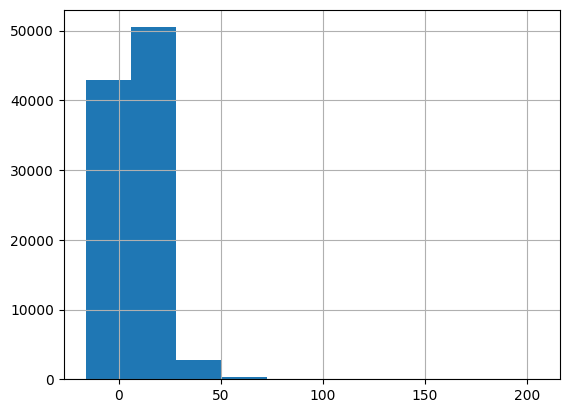

In [40]:
orders_df.delivery_time.hist()


In [ ]:
customer_id_in_orders_df = orders_df.customer_id.values

customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")

customers_df.sample(5)

In [ ]:
customers_df.groupby(by="status").customer_id.count()


Merge customers_df & orders_df

Visualization & Explanatory Analysis

In [ ]:
cust_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()


In [ ]:
cust_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)


In [ ]:
cust_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)


In [ ]:
cust_orders_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)


In [ ]:
cust_orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)


**Merge order_pay & order_rev**

In [ ]:
order_payrev_df = pd.merge(
    left=order_pay,
    right=order_rev,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payrev_df.head()


In [ ]:
order_payrev_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)


In [ ]:
order_payrev_df.sort_values(by="payment_value", ascending=False)

In [ ]:
order_payrev_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

#### Merge cust_orders_df & order_payrev

In [ ]:
customers_df = pd.merge(
    left=cust_orders_df,
    right=order_payrev_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

### Explore order_items & sellers_df

#### Merge order_items & sellers_df

In [ ]:
item_seller_df = pd.merge(
    left=order_items,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

In [ ]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

### Explore products_df & product_cat
#### Merge products_df & product_cat

In [ ]:
product_df = pd.merge(
    left=products_df,
    right=product_cat,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

In [ ]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

In [ ]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

#### Merge item_seller_df & product_df

In [ ]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

In [ ]:
sellers_df.sort_values(by="price", ascending=False)

In [ ]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

### Explore geo_df

In [ ]:
geo_df.sample(5)

In [ ]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [ ]:
geo_df['geolocation_city'] = geo_df['geolocation_city'].apply(pretty_string)

In [ ]:
geo_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

In [ ]:
geo_df[geo_df['geolocation_zip_code_prefix'] == 24220].head()

### Explore All Data
#### Merge all data

Pada kasus ini saya tidak menggabungkan dataset geolocation, karena menurut saya dataset ini tidak begitu diperlukan.

In [ ]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

In [ ]:
all_data.info()

In [ ]:
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

In [ ]:
all_data.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

In [ ]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

In [ ]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

### Convert all_data to .csv

In [ ]:
all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Produk apa yang paling banyak & sedikit terjual?

In [ ]:
sum_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)
sum_order_items_df = sum_order_items_df.head(10)

sum_order_items_df.head()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk paling banyak terjual", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk paling sedikit terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk paling banyak dan paling sedikit terjual", fontsize=20)
plt.show()

> Terlihat pada grafik diatas, Produk yang paling banya terjual adalah bed_bath_table. dan produk yang paling sedikit terjual adalah auto.


### Pertanyaan 2 : Bagaimana performa penjualan platform E-Commerce kami seiring berjalannya waktu?

In [ ]:
monthly_df = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})
monthly_df.index = monthly_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_df.head()

In [ ]:
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [ ]:
monthly_df.head()

In [ ]:
monthly_df.sort_values(by='order_count')

In [ ]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

Terlihat pada grafik diatas bahwa terjadi penurunan signifikan pada bulan September dan mengalami penaikan yang signifikan pada bulan November.

### Pertanyaan 3 : Berapa banyak uang yang dihabiskan customer dalam beberapa bulan terakhir?

In [ ]:
monthly_spend_df = all_data.resample(rule='M', on='order_approved_at').agg({
    "payment_value":"sum"
})
monthly_spend_df.index = monthly_spend_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_spend_df = monthly_spend_df.reset_index()
monthly_spend_df.rename(columns={
    "payment_value":"total_spend"
}, inplace=True)
monthly_spend_df.head()

In [ ]:
monthly_spend_df = monthly_spend_df.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')

In [ ]:
monthly_spend_df.head()

In [ ]:
monthly_spend_df.sort_values(by='total_spend')

In [ ]:
monthly_spend_df["month_numeric"] = monthly_spend_df["order_approved_at"].map(month_mapping)
monthly_spend_df = monthly_spend_df.sort_values("month_numeric")
monthly_spend_df = monthly_spend_df.drop("month_numeric", axis=1)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_spend_df["order_approved_at"],
    monthly_spend_df["total_spend"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Total customer spend money per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

Pada grafik diatas, total uang yang dihabiskan paling banyak pada bilang November dan paling sedikit pada bulan September.

### Pertanyaan 4 : Bagaimana tingkat kepuasan customer terhadap layanan kami?

In [ ]:
review_scores = all_data['review_score'].value_counts().sort_values(ascending=False)

most_common_score = review_scores.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=review_scores.index,
            y=review_scores.values,
            order=review_scores.index,
            palette=["#068DA9" if score == most_common_score else "#D3D3D3" for score in review_scores.index]
            )

plt.title("Rating by customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)
plt.show()

Pada grafik diatas menunjukan bahwa customer sangat puas dengan layanan yang disediakan, terbukti dengan data bahwa customer yang memberikan rating 5 memiliki data terbanyak daripada rating yang lainnya.

### Pertanyaan 5 : Bagaimana profil demografis customer kami, dan apakah ada perbedaan preferensi pembelian di antara mereka?

#### Berdasarkan customer_state


In [ ]:
bystate_df = all_data.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df.head()

In [ ]:
plt.figure(figsize=(12, 6))

most_common_state = bystate_df.loc[bystate_df['customer_count'].idxmax(), 'customer_state']

bystate_df = bystate_df.sort_values(by='customer_count', ascending=False)

sns.barplot(x='customer_state',
            y='customer_count',
            data=bystate_df,
            palette=["#068DA9" if state == most_common_state else "#D3D3D3" for state in bystate_df['customer_state']]
            )

plt.title("Number customers from State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number Customers")
plt.xticks(fontsize=10)
plt.show()

Pada grafik diatas berdasarkan State, SP memiliki data customer terbanyak.

In [ ]:
bycity_df = all_data['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 6))

most_common_city = bycity_df.idxmax()

bycity_df = bycity_df.sort_values(ascending=False)

sns.barplot(x=bycity_df.index,
            y=bycity_df.values,
            palette=["#068DA9" if city == most_common_city else "#D3D3D3" for city in bycity_df.index]
            )

plt.title("Number of Customers from Each City", fontsize=15)
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, fontsize=10)
plt.show()

Pada grafik diatas berdasarkan City, sao paulo memiliki data customer terbanyak.

In [ ]:
order_status_counts = all_data['order_status'].value_counts()

plt.figure(figsize=(8, 6))
order_status_counts.plot(kind='bar', color='skyblue')
plt.title('Order Status')
plt.xlabel('Status')
plt.ylabel('Number of Orders')
plt.show()

Pada grafik diatas status order paling banyak adalah delivered.

### Pertanyaan 6 : Dimana letak geografis yang memiliki customer terbanyak?

In [ ]:
other_state_geolocation = geo_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geo_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [ ]:
geolocation_silver = geo_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state','geolocation_lat','geolocation_lng']).median(numeric_only=True).reset_index() # Added numeric_only=True to handle non-numeric values
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [ ]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [ ]:
customers_silver.head()

In [ ]:
customers_silver.to_csv("geolocation.csv", index=False)

In [ ]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

In [ ]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

Banyak customer yang berasal negara bagian tenggara dan selatan.

## Conclusion

- Produk apa yang paling banyak & sedikit terjual?
> Hasil visualisasi menunjkkan bahwa customer lebih sering membeli produk bed_bath_table, dan paling tidak banyak dibeli adalah produk auto.
- Seiring berjalannya waktu, Bagaimana performa penjualan pada platform E-Commerce ?
> Performa penjualan E-Commerce memiliki kestabilan pada bulan Januari - Mei,penurunan tidak signifikan pada bulan Juni - Juli,penaikan tidak signifikan pada bulan Agustus,dan penurunan sangat signifikan pada bulan September
lalu terjadi penaikan yang sangat signifikan pada bulan Oktober-November dan kembali menurun pada bulan Desember.
- Seberapa banyak bajet yang dihabiskan customer dalam beberapa bulan terakhir?
> Berdasarkan hasil visualisasi yang sudah ditampilkan, sesuai dengan grafik pada pertanyaan ke 2 total uang yang dihabiskan customer pada bulan Januari - Mei stabil terjadi penurunan pada bulan Juni-September, kenaikan signifikan pada bulan Oktober-November, dan kembali menurun pada bulan Desember.
- Bagaimana tingkat kepuasan customer terhadap layanan kami?
> Kepuasan customer terhadap layanan yang diberikan sangatlah memuaskan dikarenakan pada visualisasi yang sudah ditampilkan memperlihatkan bahwa customer yang memberikan rating 5 sangat banyak, dan rating 4 pada urutan ke-2 terbanyak.
- Bagaimana profil demografis customer dan apakah ada perbedaan preferensi pembelian di antara mereka?
> Negara bagian yang memiliki customer terbanyak adalah SP yang artinya Kota yang memiliki customer terbanyak adalah Sao Paulo dan urutan ke-2 adalah RJ (Rio de janeiro) dan status order item customer paling banyak adalah delivered, yang artinya item yang dipesan oleh customer tidak terjadi sebuah kesalahan sehinggan item terkirim dengan sukses ke customer yang ini juga merujuk pada customer memberikan rating 5 pada pelayanan E-Commerce.
- Customer terbanyak berdasarkan letak geografis, dimana saja?> Sesuai dengan grafik yang sudah dibuat, ada lebih banyak customer di bagian tenggara dan selatan. Informasi lainnya, ada lebih banyak customer di kota-kota yang merupakan ibu kota (São Paulo, Rio de Janeiro, Porto Alegre, dan lainnya).